In [6]:
import pandas as pd
from rdkit import Chem
import matplotlib.pyplot as plt

In [8]:
def canonicalize(Dataframe: pd.DataFrame):
    
    """Canonicalizes the SMILES from Dataframe. A column called 'SMILES' is requiered

    Args: Dataframe with 'SMILES' column contaning smiles. 
    """
    
    Dataframe['SMILES'] = Dataframe['SMILES'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x))) #canonicalize smiles from a Dataframe                                          
    

In [9]:
def check_overlapp_Smiles(Dataframe_1: pd.DataFrame, Dataframe_2: pd.DataFrame):
    
    """Checks if the two Dataframes have overlapping Smiles entries and returns a Dataframe which contains
       the overlapping smiles with the data of both Dataframes. The Dataframes need to have a column called 'SMILES'

    Args: two Dataframes with 'SMILES' columns containig smiles.
    """
    df_overlapp = pd.DataFrame
    
    
    

In [11]:
df_noBIO = pd.read_csv('../Data/Biogen.csv')

In [12]:
df_BIO = pd.read_csv('../Data/Bioavailibility.csv')

In [15]:
df_noBIO.rename(columns={'Updated SMILES': 'SMILES'}, inplace=True) # change the name of the column from 'Updated SMILES' to 'SMILES'
df_BIO.rename(columns={'Updated SMILES': 'SMILES'}, inplace=True) # change the name of the column from 'Updated SMILES' to 'SMILES'

In [13]:
df_noBIO.head()

,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),MolW(Da),NumHAcceptors,NumHDonors,LogP,Lipinski_rule,Solubility_log(mol/L),Solubility(mol/L)
0,Mol1,317714313,CNc1cc(Nc2cccn(-c3ccccn3)c2=O)nn2c(C(=O)N[C@@H...,emolecules,0.675687,1.493167,0.089905,0.991226,0.518514,1.392169,434.435,9,3,1.9007,1,-5.548020,0.000003
1,Mol2,324056965,CCOc1cc2nn(CCC(C)(C)O)cc2cc1NC(=O)c1cccc(C(F)F)n1,emolecules,0.675687,1.040780,0.550228,0.099681,0.268344,1.027920,418.444,6,2,4.1809,1,-5.071409,0.000008
2,Mol3,304005766,CN(c1ncc(F)cn1)[C@H]1CCCNC1,emolecules,0.675687,-0.358806,NaN,2.000000,2.000000,1.027920,210.256,4,1,0.8039,1,NaN,NaN
3,Mol4,194963090,CC(C)(Oc1ccc(-c2cnc(N)c(-c3ccc(Cl)cc3)c2)cc1)C...,emolecules,0.675687,1.026662,1.657056,-1.158015,-1.403403,1.027920,382.847,4,2,4.8932,1,-3.925969,0.000119
4,Mol5,324059015,CC(C)(O)CCn1cc2cc(NC(=O)c3cccc(C(F)(F)F)n3)c(C...,emolecules,0.996380,1.010597,NaN,1.015611,1.092264,1.629093,450.461,6,3,4.0908,1,NaN,NaN


In [16]:
df_BIO.head()

,No,Name,SMILES,%F,logK(%F),Category,Source,MolW(Da),NumHAcceptors,NumHDonors,LogP,Lipinski_rule
0,1,3-Ketodesogestrel,C#CC1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,76.0,0.500602,1,"5,8,13,14,16",324.464,2,1,4.0487,1
1,2,Abacavir,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,83.0,0.688629,1,"3,5,8,12,13,14,16",286.339,7,3,1.0923,1
2,3,Abecarnil,COCc1c(C(=O)OC(C)C)[nH]cc2nc3ccc(OCc4ccccc4)cc...,92.0,1.060698,1,"15,16",404.466,5,1,4.9583,1
3,4,Acadesine,NC(=O)c1ncn(C2OC(CO)C(O)C2O)c1N,10.0,-0.954243,0,"15,16",258.234,8,5,-2.8243,1
4,5,Acamprosate,CC(=O)NCCCS(=O)(=O)O,11.0,-0.907997,0,"5,8,13,14,16",181.213,3,2,-0.5996,1


In [17]:
canonicalize(df_noBIO)
canonicalize(df_BIO)

In [18]:
noBIO_SMILES = df_noBIO['SMILES'].tolist()
BIO_SMILES = df_BIO['SMILES'].tolist()

In [19]:
len(BIO_SMILES)

995

In [20]:
def find_duplicates(list1, list2):

    """finds overlapping elements in a list and returns a list of them

    Args: 
         two lists 
    """

    duplicates = [] #list for saving overlapping elements

    unique_elements = set()

    for item in list1:
        if item in list2 and item not in unique_elements:
            duplicates.append(item)
            unique_elements.add(item)

    return duplicates #returns list of overlapping elements

In [21]:
overlap = find_duplicates(noBIO_SMILES, BIO_SMILES)
len(overlap) # checks the amount of overlapping smiles

24

In [22]:
overlapping_data = pd.merge(df_noBIO, df_BIO, on='SMILES', how='inner') #merging two the data of overlapping Smiles

In [63]:
overlapping_data.shape

(24, 16)

In [30]:
df_Overlapp = pd.read_csv('../Data/overlapping_data.csv')
df_cleaned = df_Overlapp.dropna(subset=['LOG SOLUBILITY PH 6.8 (ug/mL)'])
df_cleaned.head()


,Unnamed: 0,Internal ID,Vendor ID,SMILES,CollectionName,LOG HLM_CLint (mL/min/kg),LOG MDR1-MDCK ER (B-A/A-B),LOG SOLUBILITY PH 6.8 (ug/mL),LOG PLASMA PROTEIN BINDING (HUMAN) (% unbound),LOG PLASMA PROTEIN BINDING (RAT) (% unbound),LOG RLM_CLint (mL/min/kg),No,Name,%F,logK(%F),Category,Source
6,6,Mol340,32278040,CCCCC1=NC2(CCCC2)C(=O)N1Cc1ccc(-c2ccccc2-c2nn[...,emolecules,1.028327,2.168977,1.567849,NaN,NaN,2.177972,458,Irbesartan,70.0,0.367977,1,"3,5,8,12,13,14,15,16"
7,7,Mol1204,876432,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,emolecules,1.834669,1.660254,1.004321,NaN,NaN,2.226257,406,Gefitinib,60.0,0.176091,1,"3,5,8,13,14,16"
8,8,Mol1215,877450,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,emolecules,0.675687,0.720381,1.632693,NaN,NaN,1.027920,373,Fluconazole,90.0,0.954243,1,"5,8,10,12,13,14,15,16"
18,18,Mol3070,474380,CC(=O)Nc1ccc(O)cc1,emolecules,NaN,NaN,1.442480,1.887859,1.916985,NaN,10,Acetaminophen,88.0,0.865301,1,"3,5,8,10,12,13,14,15,16"
19,19,Mol3423,LN00222715,O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl,labnetworkBB,NaN,NaN,1.773786,NaN,NaN,NaN,176,Chloramphenicol,82.0,0.658541,1,"3,5,8,10,12,13,14,15,16"


/var/folders/56/k5y5cj453pvcsblxlzlzn0340000gn/T/ipykernel_17996/2697848015.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


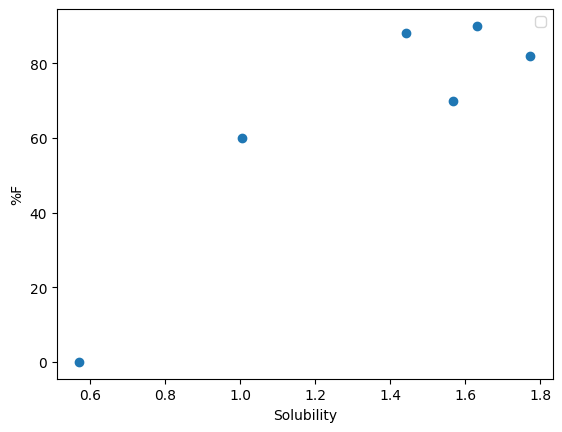

In [32]:
fig, ax = plt.subplots()
#ax.scatter(df_polarity["Solvent"], df_polarity["Elutropic_series"], label="Elutropic series")
ax.scatter(df_Overlapp["LOG SOLUBILITY PH 6.8 (ug/mL)"], df_Overlapp["%F"])
#ax.scatter(df_polarity["Solvent"], df_polarity["Dielectric_constant"], label="Dielectric constant")
#ax.scatter(df_polarity["Solvent"], df_polarity["Dipole_moment"], label="Dipole moment")
#ax.scatter(df_polarity["Solvent"], df_polarity["ET30N"], label="ET30N")

ax.set_xlabel('Solubility')
ax.set_ylabel("%F")
ax.legend()